<a href="https://colab.research.google.com/github/Mariyaa777/PGO-tutorial/blob/main/Tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6

## Introduction

### What is a perceptron?

A **perceptron** is the simplest model of an artificial neuron — the basic building block of neural networks.  
It was proposed by **Frank Rosenblatt** in 1958.

Its purpose is **linear classification** — that is, separating data using a line (in 2D), a plane (in 3D), or a hyperplane (in a multidimensional space).


### Mathematical formula of the perceptron

A perceptron takes an **input vector** and **computes an output** according to the following formula:

$$
y = f(\mathbf{w} \cdot \mathbf{x} + b)
$$

Where:
- $ \mathbf{x} = [x_1, x_2, \dots, x_n] $ — input vector,  
- $ \mathbf{w} = [w_1, w_2, \dots, w_n] $ — weight vector,  
- $ \mathbf{w} \cdot \mathbf{x} = \sum_{i=1}^{n}{w_ix_i} $ — dot product,  
- $ b $ — bias (offset),  
- $ f(\cdot) $ — activation function (e.g., step function).

For the Rosenblatt perceptron, the activation function is:

$$
f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$


### Equivalent form with bias as an additional weight

Equivalently, since:

$$
\mathbf{w} \cdot \mathbf{x} + b = (\mathbf{w}, b) \cdot (\mathbf{x}, 1),
$$

we can treat the term $ b $ as an additional weight $ w_{m+1} $,  
and add an extra coordinate equal to $ 1 $ to each input vector $ \mathbf{x} $.

Then the perceptron equation can be written as:

$$
y = f(\tilde{\mathbf{w}} \cdot \tilde{\mathbf{x}}),
$$

where:

$$
\tilde{\mathbf{w}} = [w_1, w_2, \dots, w_m, b], \quad
\tilde{\mathbf{x}} = [x_1, x_2, \dots, x_m, 1].
$$

This form means that the perceptron can be regarded as a **linear classifier passing through the origin of the coordinate system** (since the bias has been incorporated into the weight space).


### Example of perceptron calculation

Let’s assume we have the following input data:

$$ \mathbf{x} = [0.6, 0.3], \mathbf{w} = [0.4, 0.7] $$

$$
\begin{aligned}
x_1 &= 0.6, \\
x_2 &= 0.3, \\
w_1 &= 0.4, \\
w_2 &= 0.7, \\
b &= -0.5
\end{aligned}
$$

#### Step 1. Compute the weighted sum

$$
z = w_1 x_1 + w_2 x_2 + b
$$

$$
z = (0.4)(0.6) + (0.7)(0.3) - 0.5 = 0.24 + 0.21 - 0.5 = -0.05
$$

#### Step 2. Apply the activation function

$$
y = f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$

Since $z = -0.05 < 0$, therefore:

$$
\boxed{y = 0}
$$

<br><br>

### Example when the bias is added as an additional weight

$$ \mathbf{x} = [0.6, 0.3, 1], \mathbf{w} = [0.4, 0.7, -0.5] $$

$$
\begin{aligned}
x_1 &= 0.6, \\
x_2 &= 0.3, \\
x_3 &= 1, \\
w_1 &= 0.4, \\
w_2 &= 0.7, \\
w_3 &= -0.5
\end{aligned}
$$

#### Step 1. Compute the weighted sum

$$
z = w_1 x_1 + w_2 x_2 + w_3 x_3
$$

$$
z = (0.4)(0.6) + (0.7)(0.3) + (-0.5)(1) = 0.24 + 0.21 - 0.5 = -0.05
$$

#### Step 2. Apply the activation function

$$
y = f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$

Since $z = -0.05 < 0$, therefore:

$$
\boxed{y = 0}
$$


### Weight update (perceptron learning)

If the perceptron makes an error (i.e., its output $ y \neq \hat{y} $, where $ y $ is the true label and $\hat{y}$ is the predicted value), the weights are updated according to the rule:

$$
\hat{\mathbf{w}} = \mathbf{w} + \eta \times (y - \hat{y}) \times \mathbf{x}
$$

$$
w_i^{(new)} = w_i^{(old)} + \eta (y - \hat{y}) x_i
$$

$$
b^{(new)} = b^{(old)} + \eta (y - \hat{y})
$$

Where $ \eta $ is the learning rate.

If the perceptron **classifies a sample correctly** ($y = \hat{y}$), then $y - \hat{y} = 0$, so **the weights do not change**.  
If the perceptron **makes an error**, the weights are **adjusted in the direction** of the input vector $\mathbf{x}$ to increase the chance of correct classification next time.


### Example of perceptron training for the AND gate

| A | B | Y |
|:-:|:-:|:----------:|
| 0 | 0 |     0      |
| 0 | 1 |     0      |
| 1 | 0 |     0      |
| 1 | 1 |     1      |


$
\mathbf{w} = [0.4, 0.4]
$

$
\mathbf{b} = 0.7
$

<br>

Adding the bias to the weight vector:

$\tilde{\mathbf{w}} = [0.4, 0.4, 0.7]$

Perceptron equation:

$
y = f(\tilde{\mathbf{w}} \cdot \tilde{\mathbf{x}})
$

Activation function:

$
f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$

Weight update rule:

$ \hat{\mathbf{w}} = \mathbf{w} + \eta \times (y - \hat{y}) \times \mathbf{x} $


#### Epoch 1

$I.$ For $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.4, 0.7] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 0 + 0.4 \times 0 + 0.7 \times 1 = 0.7$

$ y = f(0.7) = 1 $

<br>

Error, because $y = 0$ and $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

New weights:

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.7] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.7] + [0, 0, -0.1] = [0.4, 0.4, 0.6] $

<br><br>

$II.$ For $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.4, 0.6] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 0 + 0.4 \times 1 + 0.6 \times 1 = 1 $

$ y = f(1) = 1 $

<br>

Error, because $y = 0$ and $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

New weights:

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.6] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.6] + [0, -0.1, -0.1] = [0.4, 0.3, 0.5] $

<br><br>

$III.$ For $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.3, 0.5] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 1 + 0.3 \times 0 + 0.5 \times 1 = 0.4 + 0.5 = 0.9 $

$ y = f(0.9) = 1 $

<br>

Error, because $y = 0$ and $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

New weights:

$ \hat{\mathbf{w}} = [0.4, 0.3, 0.5] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.3, 0.5] + [-0.1, 0, -0.1] = [0.3, 0.3, 0.4] $

<br><br>

$IV.$ For $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.4] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 1 + 0.3 \times 1 + 0.4 \times 1 = 0.3 + 0.3 + 0.4 = 1 $

$ y = f(1) = 1 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$


#### Epoch 2

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.4] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 0 + 0.3 \times 0 + 0.4 \times 1 = 0.4$

$ y = f(0.4) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.4] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.4] + [0, 0, -0.1] = [0.3, 0.3, 0.3] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.3] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 0 + 0.3 \times 1 + 0.3 \times 1 = 0.6 $

$ y = f(0.6) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$


<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.3] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.3] + [0, -0.1, -0.1] = [0.3, 0.2, 0.2] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.2, 0.2] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 1 + 0.2 \times 0 + 0.2 \times 1 = 0.3 + 0.2 = 0.5 $

$ y = f(0.5) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.2, 0.2] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.2, 0.2] + [-0.1, 0, -0.1] = [0.2, 0.2, 0.1] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.1] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 1 + 0.2 \times 1 + 0.1 \times 1 = 0.2 + 0.2 + 0.1 = 0.5 $

$ y = f(0.5) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoka 3

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.1] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 0 + 0.2 \times 0 + 0.1 \times 1 = 0.1$

$ y = f(0.1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.1] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.1] + [0, 0, -0.1] = [0.2, 0.2, 0.0] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.0] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 0 + 0.2 \times 1 + 0.0 \times 1 = 0.2 $

$ y = f(0.2) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$


<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.0] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.0] + [0, -0.1, -0.1] = [0.2, 0.1, -0.1] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.1, -0.1] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 1 + 0.1 \times 0 + (-0.1) \times 1 = 0.2 - 0.1 = 0.1 $

$ y = f(0.1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.1, -0.1] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.1, -0.1] + [-0.1, 0, -0.1] = [0.1, 0.1, -0.2] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 1 + (-0.2) \times 1 = 0.1 + 0.1 - 0.2 = 0 $

$ y = f(0) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoch 4

$I.$ For $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 0 + 0.1 \times 0 + (-0.2) \times 1 = -0.2$

$ y = f(-0.2) = 0 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

$II.$ For $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 0 + 0.1 \times 1 + (-0.2) \times 1 = -0.1 $

$ y = f(-0.1) = 0 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

$III.$ For $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 0 + (-0.2) \times 1 = 0.1 - 0.2 = -0.1$

$ y = f(-0.1) = 0 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

$IV.$ For $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 1 + (-0.2) \times 1 = 0.1 + 0.1 - 0.2 = 0 $

$ y = f(0) = 1 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

## In this epoch, the perceptron outputs correct results | End of training

### Example of using a Perceptron in Python code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

df = pd.DataFrame(X, columns = ['feature_1', 'feature_2'])
df['target'] = y

X = df[['feature_1', 'feature_2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Dokładność: 0.975


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


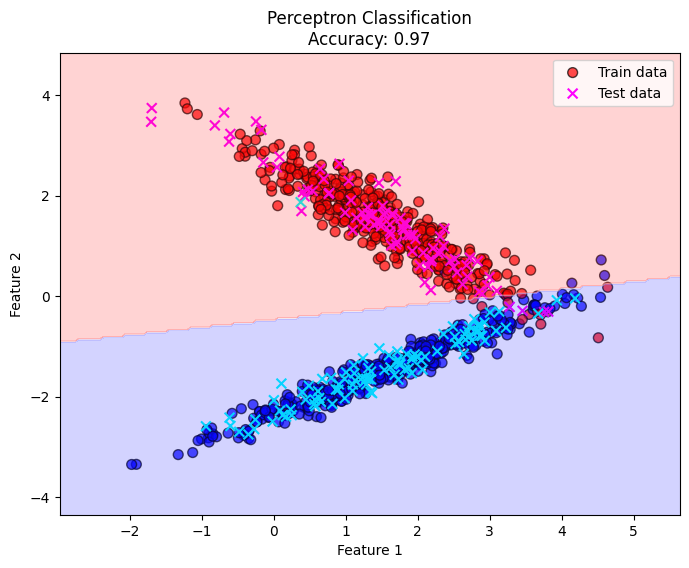

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(X_train['feature_1'], X_train['feature_2'], c=y_train, cmap='bwr', edgecolor='k', s=50, alpha=0.7)
plt.scatter(X_test['feature_1'], X_test['feature_2'], c=y_test, cmap='cool', marker='x', s=50, label='Test data')

x_min, x_max = X['feature_1'].min() - 1, X['feature_1'].max() + 1
y_min, y_max = X['feature_2'].min() - 1, X['feature_2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Perceptron Classification\nAccuracy: {accuracy:.2f}')
plt.legend(['Train data','Test data'])
plt.show()


### Perceptron Summary

The perceptron:
- computes the **weighted sum of inputs**,  
- applies an **activation function (usually a step function)**,  
- can **learn** by updating its weights,  
- works only for **linearly separable** data.

## Exercises

### Exercise 1
Train a perceptron for the OR gate
| A | B | Y = A ∨ B |
|:-:|:-:|:----------:|
| 0 | 0 |     0      |
| 0 | 1 |     1      |
| 1 | 0 |     1      |
| 1 | 1 |     1      |


$
\mathbf{w} = [0.7, 0.6]
$

$
\mathbf{b} = -1.4
$

### Exercise 2
Train a perceptron for the following values

$$
X =
\begin{bmatrix}
1.4 & 2.5 & 0.6 \\
0.8 & 1.5 & -0.1 \\
1.2 & 2.1 & -0.3 \\
0.9 & 2.1 & 0.5
\end{bmatrix},
\quad
y =
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
$$

$$
w =
\begin{bmatrix}
1.1 \\ 1.2 \\ 0.7
\end{bmatrix},
\quad
b = -0.5,
\quad
\eta = 0.1
$$


### Exercise 3
For the `breast_cancer` dataset from the `sklearn.datasets` module, perform EDA (Exploratory Data Analysis) and classify the `target` feature using a perceptron.

<br>

Example of loading the data:


```
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
```

Remember to:
- check for missing data,
- examine correlations between features,
- identify outliers,
- validate the model using metrics,
- visualize the data and the results.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

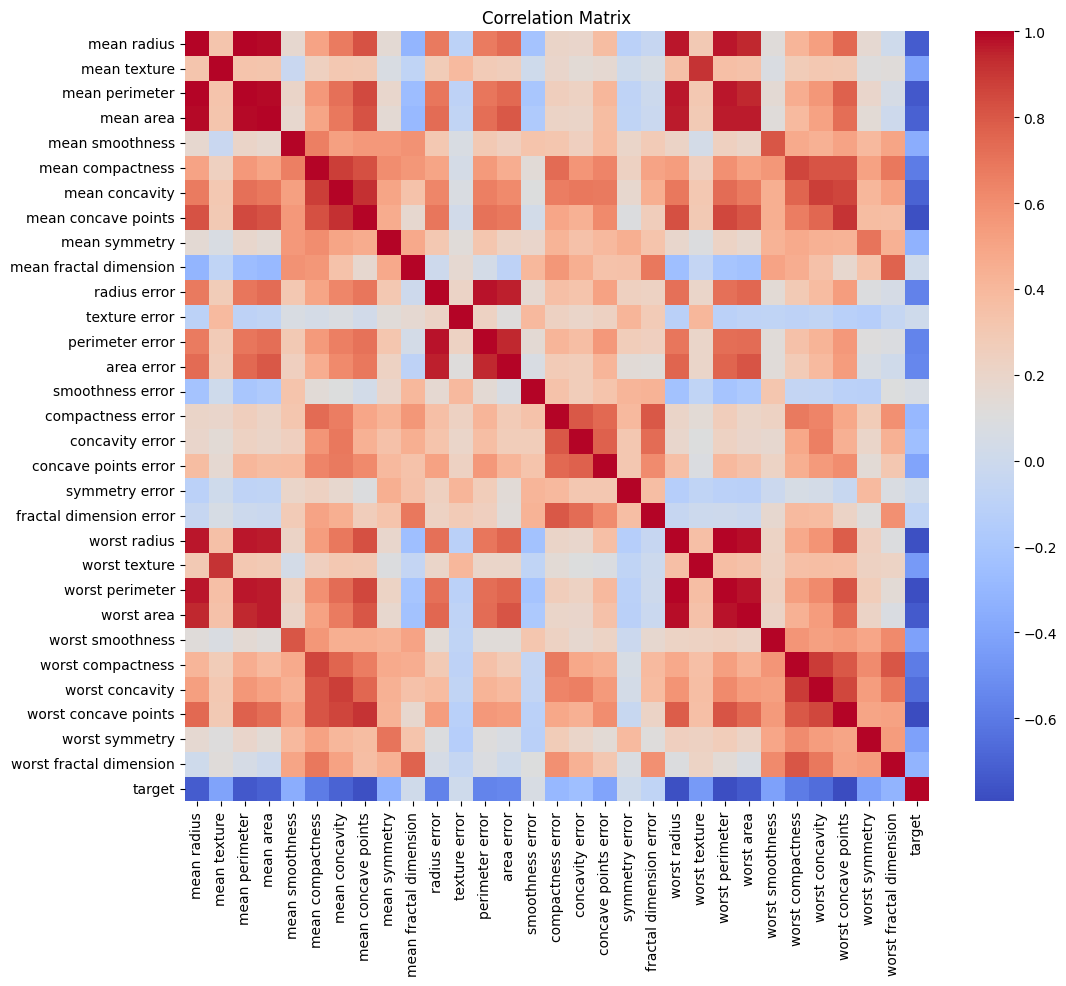

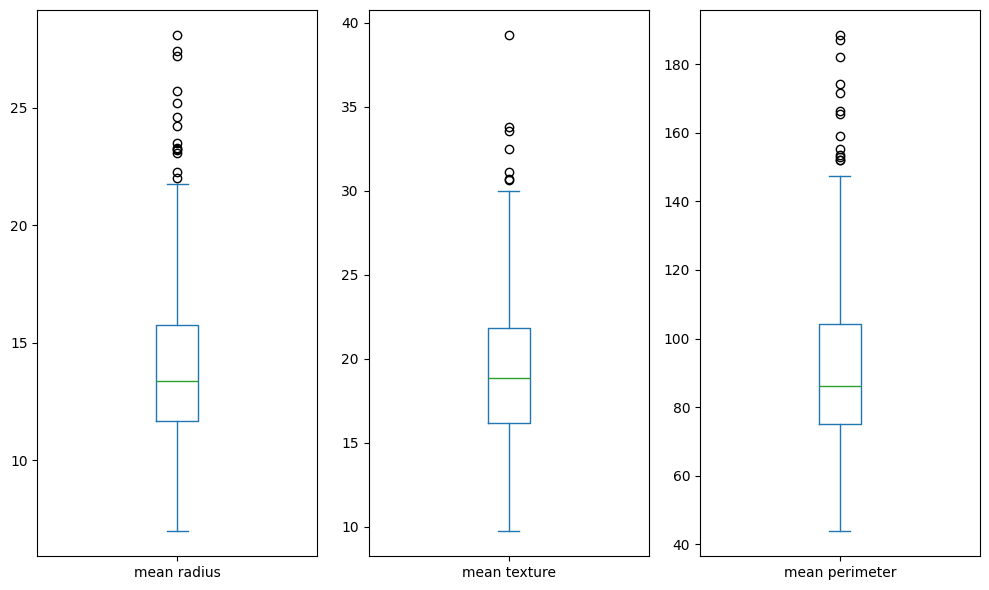

Accuracy: 0.9736842105263158


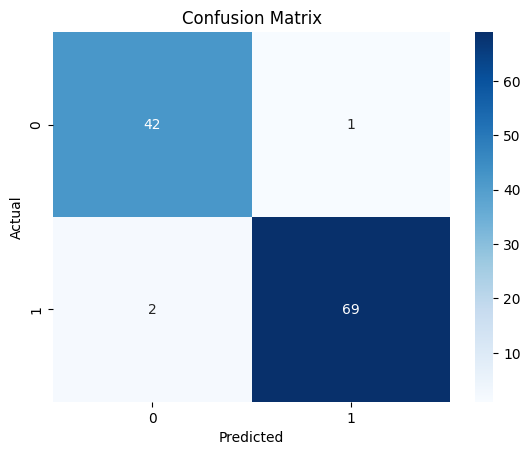

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


# EDA


print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

df[['mean radius', 'mean texture', 'mean perimeter']].plot(
    kind='box', subplots=True, figsize=(10, 6)
)
plt.tight_layout()
plt.show()


# Modeling with Perceptron


X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
